In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("../input/usa-monthly-retail-trade/mrtssales92-present.xls",sheet_name = None, header = 0, encoding = 'utf-8',errors='strict')

In [3]:
df

{'2020':     NAICS  Code                                   Kind of Business Jan. 2020  \
 0           NaN                                       NOT ADJUSTED       NaN   
 1           NaN              Retail and food services sales, total    481862   
 2           NaN  Retail sales and food services excl motor vehi...    388594   
 3           NaN  Retail sales and food services excl gasoline s...    442922   
 4           NaN  Retail sales and food services excl motor vehi...    349654   
 ..          ...                                                ...       ...   
 101         454                                 Nonstore retailers     68101   
 102        4541          Electronic shopping and mail order houses     60985   
 103       45431                                       Fuel dealers      2096   
 104         722                  Food services and drinking places     65554   
 105                                                            NaN       NaN   
 
     Feb. 2020 Mar

## Data Cleaning

removing Unnamed columns created due to encoding error by pandas in the dataframe

In [4]:
for key in df:
    df[key] = df[key].loc[:, ~df[key].columns.str.contains('^Unnamed')]

### Extract main categories

Slicing Database into two dataframes of Not Adjusted and Adjusted Main Categories (NAICS code : 4xx, 7xx)

In [5]:
df_cat_ad = {}
df_cat_nad = {}
for key in df:
    df_cat = df.copy()
    df_cat[key]['NAICS  Code'] = df_cat[key]['NAICS  Code'].astype('str')
    df_cat[key]['NAICS Code Cat'] = df_cat[key]['NAICS  Code'].str.extract('^(\d{3})$')
    index = pd.Index(df_cat[key]['Kind of Business'])
    x = index.get_loc('ADJUSTED(2)')
    df_cat_ad[key] = df_cat[key].iloc[x:]
    df_cat_ad[key] = df_cat_ad[key].dropna(subset = ['NAICS Code Cat'])
    df_cat_ad[key] = df_cat_ad[key].reset_index(drop = True)
    df_cat_ad[key] = df_cat_ad[key].drop(['NAICS Code Cat'], axis=1)
    df_cat_nad[key] = df_cat[key].iloc[0:x]
    df_cat_nad[key] = df_cat_nad[key].dropna(subset = ['NAICS Code Cat'])
    df_cat_nad[key] = df_cat_nad[key].reset_index(drop = True)
    df_cat_nad[key] = df_cat_nad[key].drop(['NAICS Code Cat'], axis=1)

In [6]:
df_cat_nad['2016']

,NAICS Code,Kind of Business,Jan. 2016,Feb. 2016,Mar. 2016,Apr. 2016,May 2016,Jun. 2016,Jul. 2016,Aug. 2016,Sep. 2016,Oct. 2016,Nov. 2016,Dec. 2016,TOTAL
0,441,Motor vehicle and parts dealers,80100.0,89308.0,100254.0,96838.0,98082.0,97700.0,98961.0,103307.0,94749.0,92033.0,89366.0,99916.0,1140614.0
1,442,Furniture and home furnishings stores,8175.0,8376.0,9258.0,8596.0,8988.0,9095.0,9157.0,9539.0,9498.0,9013.0,9903.0,10806.0,110404.0
2,443,Electronics and appliance stores,7595.0,7833.0,7933.0,7063.0,7567.0,7744.0,7807.0,8289.0,7827.0,7462.0,9756.0,12167.0,99043.0
3,444,Building mat. and garden equip. and supplies d...,21968.0,23157.0,29911.0,32399.0,34650.0,34154.0,30050.0,29849.0,28761.0,28481.0,28480.0,26837.0,348697.0
4,445,Food and beverage stores,56831.0,54005.0,57911.0,56083.0,59028.0,58294.0,59608.0,58365.0,57177.0,58442.0,58880.0,64725.0,699349.0
5,446,Health and personal care stores,26095.0,26755.0,28315.0,26924.0,27450.0,27281.0,26408.0,27716.0,26920.0,26373.0,26484.0,30432.0,327153.0
6,447,Gasoline stations,30076.0,28095.0,32564.0,34218.0,37644.0,38861.0,38563.0,37585.0,36768.0,37769.0,34683.0,35966.0,422792.0
7,448,Clothing and clothing access. stores,15685.0,18926.0,21477.0,20412.0,21648.0,20157.0,20676.0,22394.0,19816.0,20544.0,23704.0,34611.0,260050.0
8,451,"Sporting goods, hobby, musical instrument, and...",6459.0,5867.0,6940.0,6518.0,6708.0,7209.0,6911.0,7790.0,6746.0,6309.0,7600.0,11426.0,86483.0
9,452,General merchandise stores,49159.0,51088.0,55786.0,53242.0,56046.0,55054.0,55331.0,55909.0,51571.0,55195.0,61014.0,75994.0,675389.0


In [7]:
df_cat_nad['2019'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAICS  Code       13 non-null     object 
 1   Kind of Business  13 non-null     object 
 2   Jan. 2019         13 non-null     object 
 3   Feb. 2019         13 non-null     object 
 4   Mar. 2019         13 non-null     object 
 5   Apr. 2019         13 non-null     object 
 6   May 2019          13 non-null     object 
 7   Jun. 2019         13 non-null     object 
 8   Jul. 2019         13 non-null     object 
 9   Aug. 2019         13 non-null     object 
 10  Sep. 2019         13 non-null     object 
 11  Oct. 2019         13 non-null     object 
 12  Nov. 2019         13 non-null     object 
 13  Dec. 2019         13 non-null     object 
 14  TOTAL             13 non-null     float64
dtypes: float64(1), object(14)
memory usage: 1.6+ KB


In [8]:
df_cat_nad['2019']

,NAICS Code,Kind of Business,Jan. 2019,Feb. 2019,Mar. 2019,Apr. 2019,May 2019,Jun. 2019,Jul. 2019,Aug. 2019,Sep. 2019,Oct. 2019,Nov. 2019,Dec. 2019,TOTAL
0,441,Motor vehicle and parts dealers,87114,89009,109845,103156,111772,104743,109269,114659,99537,103801,101101,103463,1237469.0
1,442,Furniture and home furnishings stores,8648,8445,9846,9360,10069,9539,9944,10345,9839,9995,10782,11003,117815.0
2,443,Electronics and appliance stores,7666,6980,7675,6900,7574,7481,7669,8038,7638,7604,9985,11807,97017.0
3,444,Building mat. and garden equip. and supplies d...,27578,24888,30900,35122,38372,34575,34755,33434,30948,33719,30731,29493,384515.0
4,445,Food and beverage stores,62320,56383,62935,61781,65842,63795,65690,66165,61668,64051,65442,68992,765064.0
5,446,Health and personal care stores,29640,27825,29997,29671,30847,28966,29508,29973,28706,31088,29312,33194,358727.0
6,447,Gasoline stations,35414,34549,40960,43144,46218,43823,45450,45043,41936,43602,40730,40203,501072.0
7,448,Clothing and clothing access. stores,16201,17932,21953,21416,22938,20960,21650,23743,19464,21177,24928,34541,266903.0
8,451,"Sporting goods, hobby, musical instrument, and...",5628,5221,6305,6191,6445,6585,6549,7504,6276,6372,7289,9506,79871.0
9,452,General merchandise stores,51557,50513,58619,56815,60695,58727,58487,61460,54515,58560,66027,77648,713623.0


checking weather data contains (NA):Not Available or (S):Suppressed values

In [9]:
def string_finder(row, words):
    if any(word in field for field in row for word in words):
        return 1
    return 0

In [10]:
match = ['(NA)', '(S)']
for key in df:
    df_cat_nad[key]['isContained'] = df_cat_nad[key].astype(str).apply(string_finder, words=match, axis=1)
    df_cat_ad[key]['isContained'] = df_cat_ad[key].astype(str).apply(string_finder, words=match, axis=1)
    print(key)
    print('Not Adjusted data contains', df_cat_nad[key]['isContained'].sum(), '(NA):Not Available or (S):Suppressed values')
    print('Adjusted data contains', df_cat_ad[key]['isContained'].sum(), '(NA):Not Available or (S):Suppressed values')
#     df_cat_nad[key] = df_cat_nad[key].drop(['isContained'], axis=1)
#     df_cat_ad[key] = df_cat_ad[key].drop(['isContained'], axis=1)

2020
Not Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
2019
Not Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
2018
Not Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
2017
Not Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
2016
Not Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
2015
Not Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
2014
Not Adjusted data contains 0 (NA):Not Available or (S):Suppressed values
Adjusted data contains 0 (NA):Not Availa

In [11]:
for key in df:
    df_cat_nad[key].info()
    df_cat_ad[key].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAICS  Code       13 non-null     object
 1   Kind of Business  13 non-null     object
 2   Jan. 2020         13 non-null     object
 3   Feb. 2020         13 non-null     object
 4   Mar. 2020         13 non-null     object
 5   Apr. 2020(p)      13 non-null     object
 6   isContained       13 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 856.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAICS  Code       13 non-null     object
 1   Kind of Business  13 non-null     object
 2   Jan. 2020         13 non-null     object
 3   Feb. 2020         13 non-null     object
 4   Mar. 2020         13 non-null     object
 5   

In [12]:
df_cat_nad['1992']

,NAICS Code,Kind of Business,Jan. 1992,Feb. 1992,Mar. 1992,Apr. 1992,May 1992,Jun. 1992,Jul. 1992,Aug. 1992,Sep. 1992,Oct. 1992,Nov. 1992,Dec. 1992,TOTAL,isContained
0,441,Motor vehicle and parts dealers,29811,31217,35136,36082,36460,38389,37814,35436,35883,36738,32360,33067,418393,0
1,442,Furniture and home furnishings stores,3846,3908,4157,4141,4275,4357,4407,4446,4328,4497,4687,5287,52336,0
2,443,Electronics and appliance stores,3657,3490,3669,3527,3571,3788,3930,3817,3795,4014,4419,7014,48691,0
3,444,Building mat. and garden equip. and supplies d...,8964,9023,10608,11630,12327,12219,11658,11219,11309,11605,10156,10271,130989,0
4,445,Food and beverage stores,29589,28570,29682,30228,31677,30769,32402,31469,30162,31407,30388,34170,370513,0
5,446,Health and personal care stores,7258,7150,7413,7531,7488,7387,7277,7313,7071,7467,7115,9235,89705,0
6,447,Gasoline stations,12099,11580,12272,12443,13449,13427,13874,13825,13140,13663,13064,13488,156324,0
7,448,Clothing and clothing access. stores,6938,7524,8475,9401,9558,9182,9103,10513,9573,10254,11187,18395,120103,0
8,451,"Sporting goods, hobby, musical instrument, and...",3023,2806,3040,3150,3175,3240,3224,3586,3409,3329,3851,7133,42966,0
9,452,General merchandise stores,14996,16015,17984,18872,20037,18812,18575,20518,18700,20970,25024,37373,247876,0


Since data contains many different kinds of dtypes, cleaning data of different dtypes

In [13]:
for key in df:
    df_cat_nad[key].iloc[ : ,2: ] = df_cat_nad[key].iloc[ : ,2: ].astype(float)
    df_cat_ad[key].iloc[ : ,2: ] = df_cat_ad[key].iloc[ : ,2: ].astype(float)

In [14]:
for key in df:
    df_cat_nad[key].info()
    df_cat_nad[key].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAICS  Code       13 non-null     object 
 1   Kind of Business  13 non-null     object 
 2   Jan. 2020         13 non-null     float64
 3   Feb. 2020         13 non-null     float64
 4   Mar. 2020         13 non-null     float64
 5   Apr. 2020(p)      13 non-null     float64
 6   isContained       13 non-null     float64
dtypes: float64(5), object(2)
memory usage: 856.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAICS  Code       13 non-null     object 
 1   Kind of Business  13 non-null     object 
 2   Jan. 2020         13 non-null     float64
 3   Feb. 2020         13 non-null     float64
 4   Mar. 2020         13 non-null

In [15]:
for key in df:
    df_cat_nad[key] = df_cat_nad[key].drop(['isContained'], axis=1)
    df_cat_ad[key] = df_cat_ad[key].drop(['isContained'], axis=1)

Since our data is Categorical data we need to modify it
* seperating Total from data 
* Encoding rows into columns
* converting Rows to column and making a single dataframe for all years

In [16]:
for key in df:
    df_cat_nad[key]['Kind of Business'] = df_cat_nad[key]['NAICS  Code'] + ': ' + df_cat_nad[key]['Kind of Business']
    df_cat_ad[key]['Kind of Business'] = df_cat_ad[key]['NAICS  Code'] + ': ' + df_cat_ad[key]['Kind of Business']

In [17]:
df_cat_nad_m = {}
df_cat_ad_m = {}
for key in df:
    df_cat_nad_m[key] = df_cat_nad[key].iloc[ : ,1:-1]
    df_cat_nad_m[key] = df_cat_nad_m[key].transpose(copy = True)
    header = df_cat_nad_m[key].iloc[0]
    df_cat_nad_m[key] = df_cat_nad_m[key][1:]
    df_cat_nad_m[key] = df_cat_nad_m[key].rename(columns = header)
    df_cat_nad_m[key] = df_cat_nad_m[key].astype(float)
    df_cat_nad_m[key] = df_cat_nad_m[key].reset_index().rename(columns={'index': 'Months'})
    df_cat_ad_m[key] = df_cat_ad[key].iloc[ : ,1:-1]
    df_cat_ad_m[key] = df_cat_ad_m[key].transpose(copy = True)
    header = df_cat_ad_m[key].iloc[0]
    df_cat_ad_m[key] = df_cat_ad_m[key][1:]
    df_cat_ad_m[key] = df_cat_ad_m[key].rename(columns = header)
    df_cat_ad_m[key] = df_cat_ad_m[key].astype(float)
    df_cat_ad_m[key] = df_cat_ad_m[key].reset_index().rename(columns={'index': 'Months'})

In [18]:
df_cat_ad_m['2016']

,Months,441: Motor vehicle and parts dealers,442: Furniture and home furnishings stores,443: Electronics and appliance stores,444: Building mat. and garden equip. and supplies dealers,445: Food and beverage stores,446: Health and personal care stores,447: Gasoline stations,448: Clothing and clothing access. stores,"451: Sporting goods, hobby, musical instrument, and book stores",452: General merchandise stores,453: Miscellaneous stores retailers,454: Nonstore retailers,722: Food services and drinking places
0,Jan. 2016,92292.0,9093.0,8319.0,28977.0,57526.0,26819.0,33455.0,21211.0,7348.0,55778.0,9876.0,44516.0,53115.0
1,Feb. 2016,94522.0,9134.0,8432.0,29020.0,57553.0,27357.0,31890.0,21864.0,7325.0,56611.0,9839.0,44746.0,54262.0
2,Mar. 2016,92595.0,9085.0,8289.0,29733.0,57040.0,27226.0,33195.0,21413.0,7298.0,56397.0,10080.0,44845.0,53936.0
3,Apr. 2016,93044.0,9068.0,8309.0,28772.0,57674.0,27445.0,34150.0,21327.0,7226.0,56253.0,10222.0,45323.0,54221.0
4,May 2016,93202.0,9116.0,8334.0,28350.0,57962.0,27368.0,34953.0,21489.0,7275.0,56091.0,10068.0,46227.0,54248.0
5,Jun. 2016,93729.0,9262.0,8309.0,29117.0,58285.0,27557.0,36116.0,21585.0,7557.0,56405.0,10131.0,46806.0,54229.0
6,Jul. 2016,95136.0,9194.0,8386.0,28866.0,57967.0,27508.0,35673.0,21346.0,7206.0,56153.0,10097.0,46783.0,54264.0
7,Aug. 2016,95324.0,9172.0,8484.0,28796.0,58172.0,27414.0,34898.0,21716.0,7037.0,56211.0,10003.0,47118.0,54677.0
8,Sep. 2016,96191.0,9376.0,8170.0,28963.0,58480.0,27413.0,35767.0,21792.0,7056.0,55716.0,10270.0,47434.0,55265.0
9,Oct. 2016,96201.0,9225.0,8067.0,29103.0,58803.0,26559.0,36705.0,21617.0,7081.0,56130.0,10425.0,48075.0,55249.0


In [19]:
for key in df:
    df_cat_nad_m[key].info()
    df_cat_nad_m[key].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 14 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Months                                                           3 non-null      object 
 1   441: Motor vehicle and parts dealers                             3 non-null      float64
 2   442: Furniture and home furnishings stores                       3 non-null      float64
 3   443: Electronics and appliance stores                            3 non-null      float64
 4   444: Building mat. and garden equip. and supplies dealers        3 non-null      float64
 5   445: Food and beverage stores                                    3 non-null      float64
 6   446: Health and personal care stores                             3 non-null      float64
 7   447: Gasoline stations                          

In [20]:
df_NA_months = pd.concat(df_cat_nad_m,ignore_index=True)
df_A_months = pd.concat(df_cat_ad_m,ignore_index=True)

In [21]:
df_A_months

,Months,441: Motor vehicle and parts dealers,442: Furniture and home furnishings stores,443: Electronics and appliance stores,444: Building mat. and garden equip. and supplies dealers,445: Food and beverage stores,446: Health and personal care stores,447: Gasoline stations,448: Clothing and clothing access. stores,"451: Sporting goods, hobby, musical instrument, and book stores",452: General merchandise stores,453: Miscellaneous stores retailers,454: Nonstore retailers,722: Food services and drinking places
0,Jan. 2020,105634.0,10139.0,8160.0,33922.0,64384.0,30017.0,42557.0,22503.0,6698.0,59963.0,11984.0,68101.0,65554.0
1,Feb. 2020,105229.0,10133.0,8056.0,33314.0,64329.0,30006.0,41302.0,22135.0,6714.0,59895.0,11877.0,68924.0,65359.0
2,Mar. 2020,77997.0,7897.0,6641.0,33544.0,81607.0,31552.0,34483.0,11362.0,5557.0,64986.0,10230.0,72365.0,45728.0
3,Jan. 2019,99055.0,9535.0,8147.0,33530.0,63462.0,29699.0,38831.0,22068.0,6514.0,59079.0,10616.0,62884.0,61616.0
4,Feb. 2019,99357.0,9651.0,8032.0,31585.0,62025.0,29887.0,40646.0,21970.0,6576.0,58594.0,10650.0,63494.0,62219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,Aug. 1992,34585.0,4372.0,4048.0,10915.0,31041.0,7508.0,13092.0,10141.0,3512.0,20593.0,4494.0,6766.0,16733.0
335,Sep. 1992,35890.0,4345.0,4098.0,10980.0,30942.0,7420.0,13246.0,10154.0,3566.0,20684.0,4549.0,6714.0,16812.0
336,Oct. 1992,35972.0,4299.0,4186.0,10971.0,31148.0,7535.0,13304.0,10174.0,3607.0,20851.0,4809.0,6665.0,17104.0
337,Nov. 1992,35928.0,4368.0,4118.0,10873.0,30992.0,7497.0,13358.0,10076.0,3626.0,21078.0,5059.0,6610.0,17420.0


### Time Series Indexing
Converting Months to Datetime64[ns] for time series analysis

In [22]:
df_NA_months['Months'] = pd.to_datetime(df_NA_months['Months'], infer_datetime_format=True)
df_A_months['Months'] = pd.to_datetime(df_A_months['Months'], infer_datetime_format=True)

In [23]:
df_NA_months = df_NA_months.set_index('Months')
df_A_months = df_A_months.set_index('Months')

In [24]:
df_A_months

,441: Motor vehicle and parts dealers,442: Furniture and home furnishings stores,443: Electronics and appliance stores,444: Building mat. and garden equip. and supplies dealers,445: Food and beverage stores,446: Health and personal care stores,447: Gasoline stations,448: Clothing and clothing access. stores,"451: Sporting goods, hobby, musical instrument, and book stores",452: General merchandise stores,453: Miscellaneous stores retailers,454: Nonstore retailers,722: Food services and drinking places
Months,,,,,,,,,,,,,
2020-01-01,105634.0,10139.0,8160.0,33922.0,64384.0,30017.0,42557.0,22503.0,6698.0,59963.0,11984.0,68101.0,65554.0
2020-02-01,105229.0,10133.0,8056.0,33314.0,64329.0,30006.0,41302.0,22135.0,6714.0,59895.0,11877.0,68924.0,65359.0
2020-03-01,77997.0,7897.0,6641.0,33544.0,81607.0,31552.0,34483.0,11362.0,5557.0,64986.0,10230.0,72365.0,45728.0
2019-01-01,99055.0,9535.0,8147.0,33530.0,63462.0,29699.0,38831.0,22068.0,6514.0,59079.0,10616.0,62884.0,61616.0
2019-02-01,99357.0,9651.0,8032.0,31585.0,62025.0,29887.0,40646.0,21970.0,6576.0,58594.0,10650.0,63494.0,62219.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992-08-01,34585.0,4372.0,4048.0,10915.0,31041.0,7508.0,13092.0,10141.0,3512.0,20593.0,4494.0,6766.0,16733.0
1992-09-01,35890.0,4345.0,4098.0,10980.0,30942.0,7420.0,13246.0,10154.0,3566.0,20684.0,4549.0,6714.0,16812.0
1992-10-01,35972.0,4299.0,4186.0,10971.0,31148.0,7535.0,13304.0,10174.0,3607.0,20851.0,4809.0,6665.0,17104.0


## Data Visualization

In [25]:
from matplotlib import pyplot

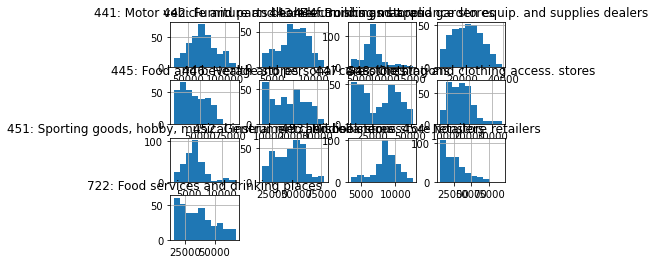

In [26]:
df_NA_months.hist()
pyplot.show()